# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [177]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [178]:
import numpy as np
from scipy import stats, integrate
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [179]:
df.columns

Index(['temperature', 'gender', 'heart_rate'], dtype='object')

In [180]:
len(df.index)

130

In [181]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


# Q1) Is the distribution of body temperatures normal? 
Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population. 

# Ans: 
We will
    1)plot histogram of tempertaure data
    2)plot the CDF of our discrete temperature data against a theoretical normal CDF
    3)plot a qq plot
    

In [182]:
#data for plotting histogram
n_data = len(df.index)
#good practice to have number of bins equal to square root of data
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)

In [183]:
n_bins

11

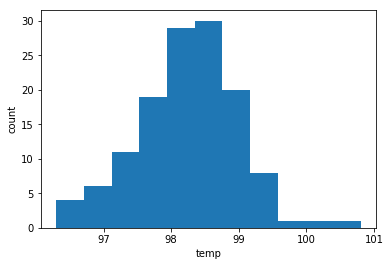

In [184]:
_ = plt.hist(df['temperature'],bins=n_bins)
_ = plt.xlabel('temp')
_ = plt.ylabel('count')

In [185]:
#converting temperature data into array
array_temperature=df['temperature'].values

In [186]:
#getting data to form discrete cumulative graph for temmperature data
def ecdf(data):
    
 # Number of data points: n_data above
   
    # x-data for the ECDF: x
    x = np.sort(data)

    n=len(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [194]:
#theoretical normal function using mean and standard deviation from temperature data
mu = np.mean(df['temperature'])
sigma = np.std(df['temperature'])

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)

In [196]:
print ('mean temperature=',mu)
print ('std dvn of temperature=',sigma)

mean temperature= 98.24923076923078
std dvn of temperature= 0.7303577789050377


<function matplotlib.pyplot.show>

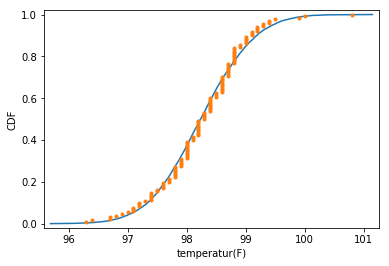

In [190]:
x, y = ecdf(array_temperature)
# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('temperatur(F)')
_ = plt.ylabel('CDF')
plt.show

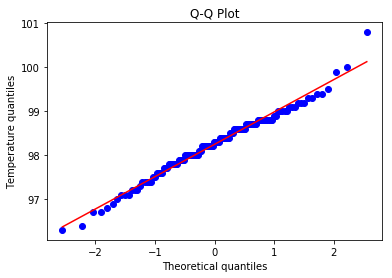

In [201]:
stats.probplot(array_temperature, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.ylabel("Temperature quantiles")
plt.show()

All three plots (histogram, CDFs and Q-Q) indicate that our sample is approximately normally distributed.

# Q2)Is the sample size large? Are the observations independent? 
Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.

# Ans 
For a large sample size (rule of thumb: n ≥ 30), sample mean is approximately normally distributed, regardless of the distribution of the population one samples.Our sample size of 130 is large enough for CLT. The observations are drawn from individual persons and hence should be independent.

# Q3 Is the true population mean really 98.6 degrees F? 
Would you use a one-sample or two-sample test? Why? In this situation, is it appropriate to use the t or zstatistic? 
Now try using the other test. How is the result be different? Why? 

# Ans:
We need to use 1 sample test to check if mean is different from 98.6 F. When sample size is relatively large the t-score is approximately equal to z-score . The null hypothesis (H0)is that the true popultation temperature average is 98.6 F. We will try three methods
1)bootstrap test
2)z test
3)t test

In [89]:
#Take bootstrap replicates of the temperature data
#number of replicates
def get_replicates(samp,n_of_rep,size):
    samp_replicates=np.empty(n_of_rep)
    for i in range(n_of_rep):
                samp_replicates[i]= np.mean(np.random.choice(samp, size))
            
    return samp_replicates


In [204]:
#create array of by shifting the temperature data so that its mean is 98.6
shifted_data=array_temperature-mu+98.6
temp_replicates=get_replicates(shifted_data,1000,130)
print('std dvn of sample=',np.std(temp_replicates))
print('mean of sample=',np.mean(temp_replicates))
conf_int = np.percentile(temp_replicates, [2.5, 97.5])
print('95% confidence interval=',conf_int)

std dvn of sample= 0.0637548926072
mean of sample= 98.5994692308
95% confidence interval= [ 98.47305769  98.72234615]


In [260]:
# Compute fraction of replicates that are less than the 0bserved
p = np.sum(temp_replicates <= mu) / 1000

# Print the p-value
print('p = ', p)
#z test

p =  0.0


So hypothesis that the mean 98.26 of our sample is not signficantly different from population mean of 98.6 is not true.We will now do a t test with the same hypothesis that there is no significant difference in temperature between sample and general population.

In [219]:
#ztest
SE=sigma/(n_data**0.5)
print (SE)
z_val=(mu-98.6)/SE
# P value calculation
P_val=stats.norm.cdf(z_val) * 2 # two sided
print('the z val is',z_val,';  pvalue is',P_val)

0.06405661469519336
the z val is -5.475925202078116 ;  pvalue is 4.35231516588e-08


In [214]:
#trying python in built t test
t_stat,p_value=stats.ttest_1samp(array_temperature, 98.6)
print('the t stat is',t_stat,';  pvalue is',p_value)

the t stat is -5.45482329236 ;  pvalue is 2.41063204156e-07


At 95% confidence level , this shows that both t and z test indicate that our null hypothesis that the population mean is 98.6 F is wrong. 

# Q4)Draw a small sample of size 10 from the data and repeat both tests. 
Which one is the correct one to use? 
What do you notice? What does this tell you about the difference in application of the 
t and z statistic? 

# Ans: 
10 will be too small a sample size to draw for z test, nevertheless we will do a bootstrap test and then a t test.

In [266]:
#shifting array so that mean is 98.6
shifted_data_2=array_temperature-mu+98.6
temp_replicates_2=get_replicates(shifted_data_2,1000,10)
print(np.std(temp_replicates_2))
print(np.mean(temp_replicates_2))
conf_int_2 = np.percentile(temp_replicates_2, [2.5, 97.5])
print(conf_int_2)

0.236251626661
98.5970992308
[ 98.16076923  99.08101923]


In [267]:
# Compute fraction of replicates that are less than the 0bserved
p = np.sum(temp_replicates_2 <= mu) / 1000

# Print the p-value
print('p = ', p)
#z test with smaller sample size of 10

p =  0.071


At 95% confidence level , this would not reject the null hypothesis that that the sample and population mean are the same. 

In [231]:
sample_of_10=np.random.choice(array_temperature,10)
stats.ttest_1samp(sample_of_10, 98.6)


Ttest_1sampResult(statistic=-1.1838326968007498, pvalue=0.26680263387753328)

The problem is that t stat moves around with different runs of the code and hence no conclusion can be drawn. It appears that sample size of 10 is too small to draw any conclusion.  

# Q5 At what temperature should we consider someone's temperature to be "abnormal"? 
Start by computing the margin of error and confidence interval. 


Ans: We are calculating the confidence interval of the population and not sample means. We will assume that sample std dvn is same as  population std dvn. This is the best apporoximation we have.

In [302]:
#calculate with  95%  confidence, the confidence internal from original data
conf_int_95 = stats.norm.interval(0.95, loc=mu, scale=sigma)
print('95% level confidence interval is', conf_int_95)
s1_95,s2_95 =conf_int_95[0]-mu,conf_int_95[1]-mu
print('The margin of error is',s2_95-s1_95,'F at 95% confidence level')

print ('So',(len(df[(df.temperature < conf_int_95[0]) | (df.temperature > conf_int_95[1])])),'out of a sample of ',len(df.temperature),'above have temperatures that fall outside of our confidence interval')

95% level confidence interval is (96.81775582674824, 99.680705711713316)
The margin of error is 2.86294988497 F at 95% confidence level
So 8 out of a sample of  130 above have temperatures that fall outside of our confidence interval


So at 95% confidence level, the margin of error for mean 98.2492 F body temperature is +/-1.43 F.So temperature below 96.82 F and above  99.68 should be considered abnormal.A word of caution here- may be sample std dvn is not the same as population std dvn. 

# Q6 Is there a significant difference between males and females in normal temperature? 
What test did you use and why? 
Write a story with your conclusion in the context of the original problem. 

# Ans: 
We will do 2 sample z as well as t tests. Our null hypothesis is that the male and female temperatures are essentially the same.

In [143]:
array_temperature_male=df[df['gender']=='M']['temperature'].values
array_temperature_female=df[df['gender']=='F']['temperature'].values

In [305]:
mu_male = np.mean(array_temperature_male)
median_male = np.median(array_temperature_male)
sigma_male = np.std(array_temperature_male)
len_male=len(array_temperature_male)
print('male mean=',mu_male)
print('male median=',median_male)
print('male std=',sigma_male)
print('male data points=',len_male)

mu_female = np.mean(array_temperature_female)
median_female = np.median(array_temperature_female)
sigma_female = np.std(array_temperature_female)
len_female=len(array_temperature_female)
print('female mean=', mu_female)
print('female median=',median_female)
print('female std=',sigma_female)
print('female data points=',len_female)

male mean= 98.1046153846
male median= 98.1
male std= 0.693359884183
male data points= 65
female mean= 98.3938461538
female median= 98.4
female std= 0.737746448643
female data points= 65


In [161]:
stats.ttest_ind(array_temperature_male,array_temperature_female,equal_var=False)

Ttest_indResult(statistic=-2.2854345381656112, pvalue=0.023938264182934196)

In [164]:
#second method
def twoSampZ(X1, X2, mudiff, sd1, sd2, n1, n2):
    pooledSE = np.sqrt(sd1**2/n1 + sd2**2/n2)
    z = ((X1 - X2) - mudiff)/pooledSE
    pval = 2*(1 - stats.norm.cdf(np.abs(z)))
    return round(z, 3), round(pval, 4)

In [171]:
z_test_result = twoSampZ(mu_male,mu_female,0,sigma_male,sigma_female,len_male,len_female)
print(z_test_result)

(-2.3029999999999999, 0.021299999999999999)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000148CF89E470>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000148CF927320>], dtype=object)

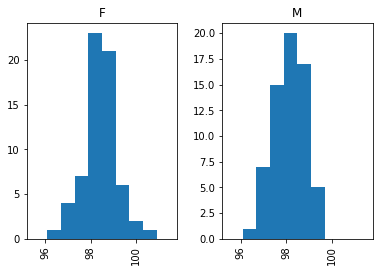

In [175]:
# Show histograms for males and females separately
df['temperature'].hist(by=df['gender'], range=[95.5, 101.5])


A p and t values are less than 0.025 (two-tailed hypothesis for 95% significane), we can reject the null hypothesis that the male and female body temperatures are the same. But to be sure, it does not mean we can conclude that male and female body temperatures are different. 